
**Challenge 1**

Use the file  ```Data_Marketing_Customer_Analysis_Round3.csv```
- Check if there are highly correlated features and drop them (if there are any).
- One Hot Encoding of the categorical nominal variables, Ordinal Encoding of the categorical ordinal variables.


In [1]:
import seaborn as sns

In [81]:
import matplotlib.pyplot as plt

In [37]:
import numpy as np

In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

In [4]:
import pandas as pd

In [8]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, OrdinalEncoder

In [5]:
data = pd.read_csv('marketing_customer_analysis_clean.csv', skipinitialspace = True)

In [ ]:
"""pd.get_dummies(test_df_categoricals[["species"]]"""

"""Ordinal Encoding"""

In [6]:
data

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [7]:
data.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type', 'month'],
      dtype='object')

In [11]:
data_numericals = data.select_dtypes(include="number")

In [25]:
data_columns = data.columns


In [28]:
data_categorical = list(set(data_columns) - set(data_numericals.columns))

In [18]:
data_corr = data_numericals.corr()

In [20]:
data_corr

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
unnamed:_0,1.000000,0.001355,0.008910,0.000863,0.007722,0.012795,0.007108,0.002319,-0.000593,0.004755
customer_lifetime_value,0.001355,1.000000,0.028306,0.403069,0.015683,0.016960,-0.031501,0.016024,0.232626,-0.009234
income,0.008910,0.028306,1.000000,-0.009788,-0.023126,-0.005903,0.006956,-0.009960,-0.354141,-0.000443
monthly_premium_auto,0.000863,0.403069,-0.009788,1.000000,0.008504,0.018953,-0.010066,-0.020505,0.631799,0.007253
months_since_last_claim,0.007722,0.015683,-0.023126,0.008504,1.000000,-0.038155,0.002246,0.007425,0.012728,-0.019359
months_since_policy_inception,0.012795,0.016960,-0.005903,0.018953,-0.038155,1.000000,0.004247,-0.009123,0.003095,0.015163
number_of_open_complaints,0.007108,-0.031501,0.006956,-0.010066,0.002246,0.004247,1.000000,0.003964,-0.011025,-0.004671
number_of_policies,0.002319,0.016024,-0.009960,-0.020505,0.007425,-0.009123,0.003964,1.000000,-0.008923,0.005127
total_claim_amount,-0.000593,0.232626,-0.354141,0.631799,0.012728,0.003095,-0.011025,-0.008923,1.000000,0.001425
month,0.004755,-0.009234,-0.000443,0.007253,-0.019359,0.015163,-0.004671,0.005127,0.001425,1.000000


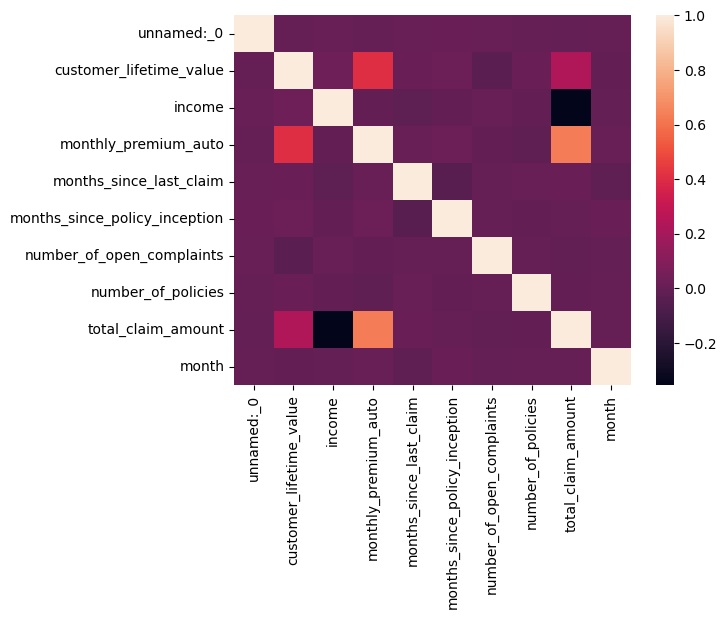

In [19]:
heatmap = sns.heatmap(data = data_corr)

In [22]:
data.dtypes

unnamed:_0                         int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

In [23]:
data.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type', 'month'],
      dtype='object')

In [29]:
data_categorical 

['location_code',
 'response',
 'coverage',
 'gender',
 'state',
 'policy',
 'vehicle_type',
 'effective_to_date',
 'policy_type',
 'employmentstatus',
 'sales_channel',
 'vehicle_class',
 'education',
 'customer',
 'vehicle_size',
 'marital_status',
 'renew_offer_type']

In [ ]:
#pd.get_dummies(test_df_categoricals['species'])

In [30]:
pd.get_dummies(data_categorical)

,coverage,customer,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy,policy_type,renew_offer_type,response,sales_channel,state,vehicle_class,vehicle_size,vehicle_type
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
scaler = OrdinalEncoder()

In [73]:
categorical_scale = np.array([["coverage","education", "renew_offer_type"]]).reshape(-1,1)

In [74]:
scaler.fit(categorical_scale)

OrdinalEncoder()

In [75]:
scaled_cats= scaler.transform(categorical_scale)

In [76]:
scaled_cats

array([[0.],
       [1.],
       [2.]])

In [53]:
categorical_scale

array([['coverage'],
       ['educataion']], dtype='<U10')

In [ ]:
"""orden.fit(New_df[["coverage","education", "renew_offer_type"]])
New_df[["coverage","education", "renew_offer_type"]] = orden.transform(New_df[["coverage","education", "renew_offer_type"]])"""

2 Begin by visually examining distributions (histograms) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has a noticeably large skew. For example, you might select customer_lifetime_value as a candidate varB which has skew.

varA
Use minmax transform to bring varA's values into the range [0,1].
Check that varA has been rescaled using a displot or a histogram
varB
Use PowerTransformer to reduce its skew (StandardScaler is included!).
Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

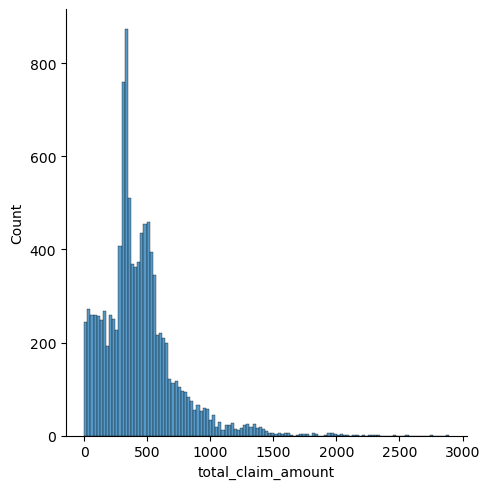

In [54]:
#penguins = sns.load_dataset("penguins")
#sns.displot(penguins, x="flipper_length_mm")

sns.displot(data, x= "total_claim_amount")

In [55]:
scaler = MinMaxScaler()

In [79]:
varA = scaler.fit_transform(data[["total_claim_amount"]])


In [80]:
varA

array([[2280.],
       [4444.],
       [3541.],
       ...,
       [2919.],
       [4075.],
       [4808.]])

In [82]:
data[["total_claim_amount"]]=varA

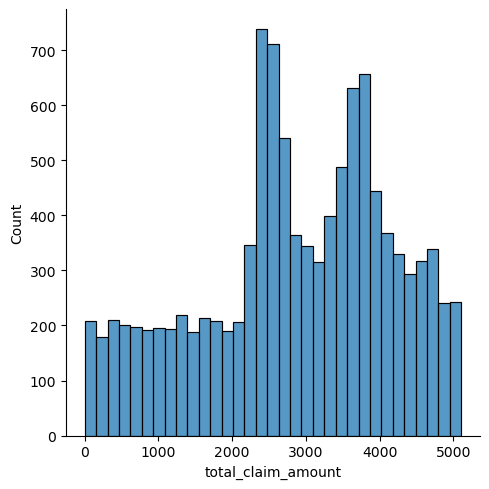

In [84]:
sns.displot(data, x= "total_claim_amount")

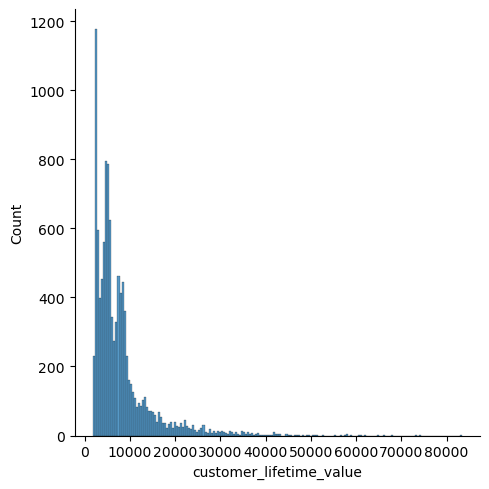

In [85]:
sns.displot(data, x= "customer_lifetime_value")

In [86]:
power = PowerTransformer(method='yeo-johnson', standardize=True)

In [90]:
varB = power.fit_transform(data[["customer_lifetime_value"]])

In [91]:
data[["customer_lifetime_value"]]=varB

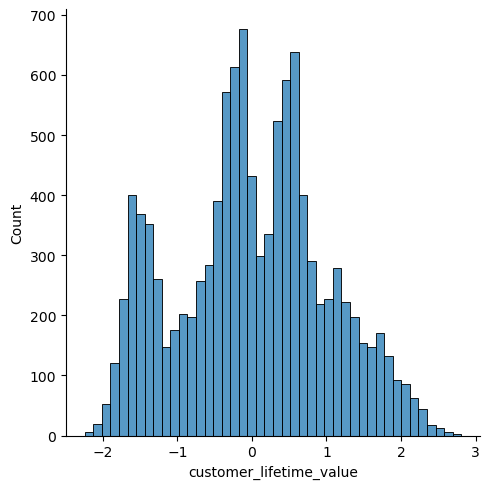

In [92]:
sns.displot(data, x= "customer_lifetime_value")